In [6]:
import pandas as pd 

df = pd.read_excel("Interview Assignment.xlsx")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Club Name                               804 non-null    object        
 1   Units                                   804 non-null    int64         
 2   Join Date                               804 non-null    datetime64[ns]
 3   Activity Code                           804 non-null    object        
 4   Membership Type                         804 non-null    object        
 5   Membership Type Access Category (Golf)  804 non-null    object        
 6   Membership Type Description             804 non-null    object        
 7   Initiation Fee Paid                     804 non-null    int64         
 8   Monthly Base Dues                       804 non-null    int64         
 9   Network Upgrade Dues                    804 non-null  

,Club Name,Units,Join Date,Activity Code,Membership Type,Membership Type Access Category (Golf),Membership Type Description,Initiation Fee Paid,Monthly Base Dues,Network Upgrade Dues,MEMBERSHIP_ID,ACTIVITY_OUT,DUES_NET,Primary Age
0,Farmers Branch Golf & Racquet Club,1,2021-01-05,ENROLL,Golf,Full,Young Executive Golf,500,459,0,14781999199,New Member,459,33.0
1,Farmers Branch Golf & Racquet Club,1,2021-01-05,ENROLL,Golf,Full,Young Executive Golf,500,459,0,14789999199,New Member,459,39.0
2,Farmers Branch Golf & Racquet Club,1,2021-01-05,REINST,Golf,Limited,Practice and Play,100,339,0,19231999199,New Member,339,46.0
3,Farmers Branch Golf & Racquet Club,1,2021-03-01,REINST,Golf,Limited,2019 ONE Full Golf Sponsor,0,500,65,14552999199,New Member,565,NaN
4,Farmers Branch Golf & Racquet Club,1,2021-01-05,ENROLL,Golf,Limited,Practice and Play,500,339,0,14786999199,New Member,339,49.0


/var/folders/m_/t8090cy519zf79rlx8wpbn1h0000gn/T/ipykernel_74236/3872329153.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped['Join Month Year'].unique().astype(str), rotation=45)


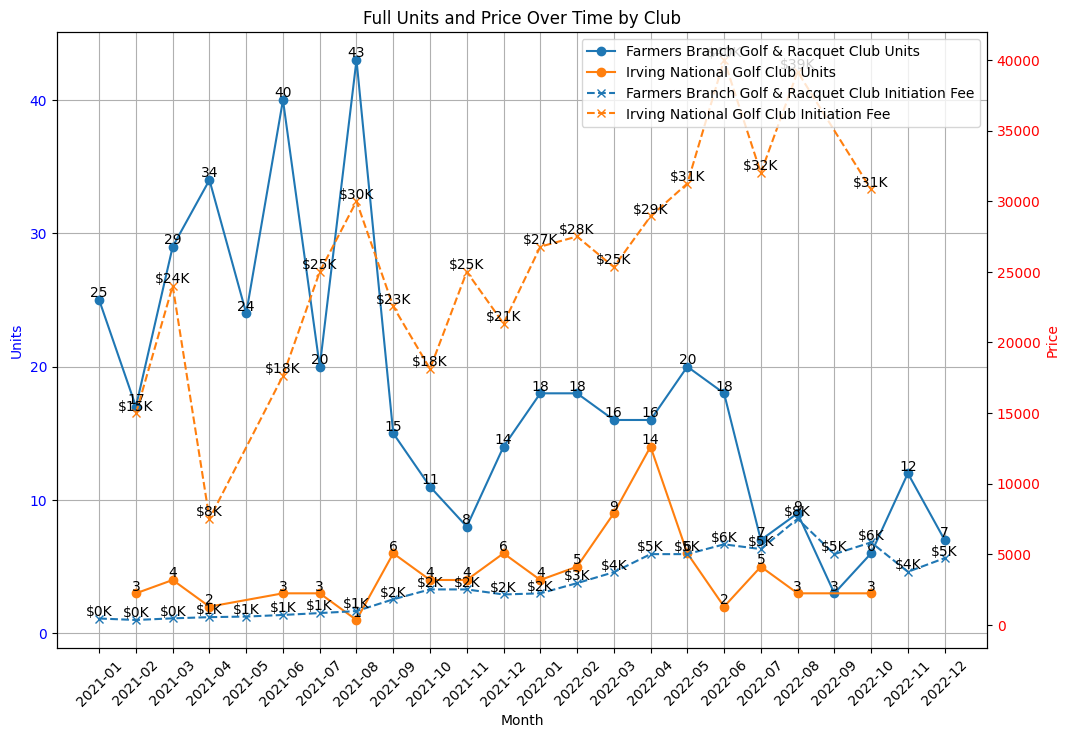

In [7]:
import matplotlib.pyplot as plt

df['Join Month Year'] = df['Join Date'].dt.to_period('M')

df_grouped = df[df['Membership Type Access Category (Golf)'] == "Full"].groupby(['Join Month Year', 'Club Name']).agg(
    {
        'Units':'sum',
        'Initiation Fee Paid': 'mean'
    }).reset_index()
df_grouped.head() 

# Create a figure and axis for the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting units on the first y-axis
for club in df_grouped['Club Name'].unique():
    club_data = df_grouped[df_grouped['Club Name'] == club]
    ax1.plot(club_data['Join Month Year'].astype(str), club_data['Units'], marker='o', linestyle='-', label=f'{club} Units')

    # Adding data labels for units directly on data points
    for i, txt in enumerate(club_data['Units']):
        ax1.text(club_data['Join Month Year'].astype(str).iloc[i], club_data['Units'].iloc[i], 
                 f'{txt}', color='black', ha='center', va='bottom')
        
ax1.set_xlabel('Month')
ax1.set_ylabel('Units', color='b')
ax1.tick_params(axis='y', labelcolor='b')
#ax1.legend(loc='upper left')
ax1.set_xticklabels(df_grouped['Join Month Year'].unique().astype(str), rotation=45)
ax1.grid(True)

# Create a second y-axis for the price
ax2 = ax1.twinx()

# Plotting price on the second y-axis
for club in df_grouped['Club Name'].unique():
    club_data = df_grouped[df_grouped['Club Name'] == club]
    ax2.plot(club_data['Join Month Year'].astype(str), club_data['Initiation Fee Paid'], marker='x', linestyle='--', label=f'{club} Initiation Fee')

    # Adding data labels for price directly on data points
    for i, txt in enumerate(club_data['Initiation Fee Paid']):
        ax2.text(club_data['Join Month Year'].astype(str).iloc[i], club_data['Initiation Fee Paid'].iloc[i], 
                 f'${txt/1000:,.0f}K', color='black', ha='center', va='bottom')
        
        #ax2.text(club_data['month'].astype(str).iloc[i], club_data['price'].iloc[i] / 1000, 
         #        f'${txt / 1000:,.0f}K', color='r', ha='center', va='bottom')
        
ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Full Units and Price Over Time by Club')
plt.xticks(rotation=45)
plt.savefig("FullUnitsandPriceOverTime.jpg")

plt.show()


In [8]:
df_grouped[df_grouped["Club Name"]=='Farmers Branch Golf & Racquet Club']

,Join Month Year,Club Name,Units,Initiation Fee Paid
0,2021-01,Farmers Branch Golf & Racquet Club,25,440.000000
1,2021-02,Farmers Branch Golf & Racquet Club,17,335.294118
3,2021-03,Farmers Branch Golf & Racquet Club,29,451.724138
5,2021-04,Farmers Branch Golf & Racquet Club,34,536.764706
7,2021-05,Farmers Branch Golf & Racquet Club,24,577.083333
8,2021-06,Farmers Branch Golf & Racquet Club,40,691.750000
10,2021-07,Farmers Branch Golf & Racquet Club,20,825.000000
12,2021-08,Farmers Branch Golf & Racquet Club,43,966.279070
14,2021-09,Farmers Branch Golf & Racquet Club,15,1800.000000
16,2021-10,Farmers Branch Golf & Racquet Club,11,2500.000000


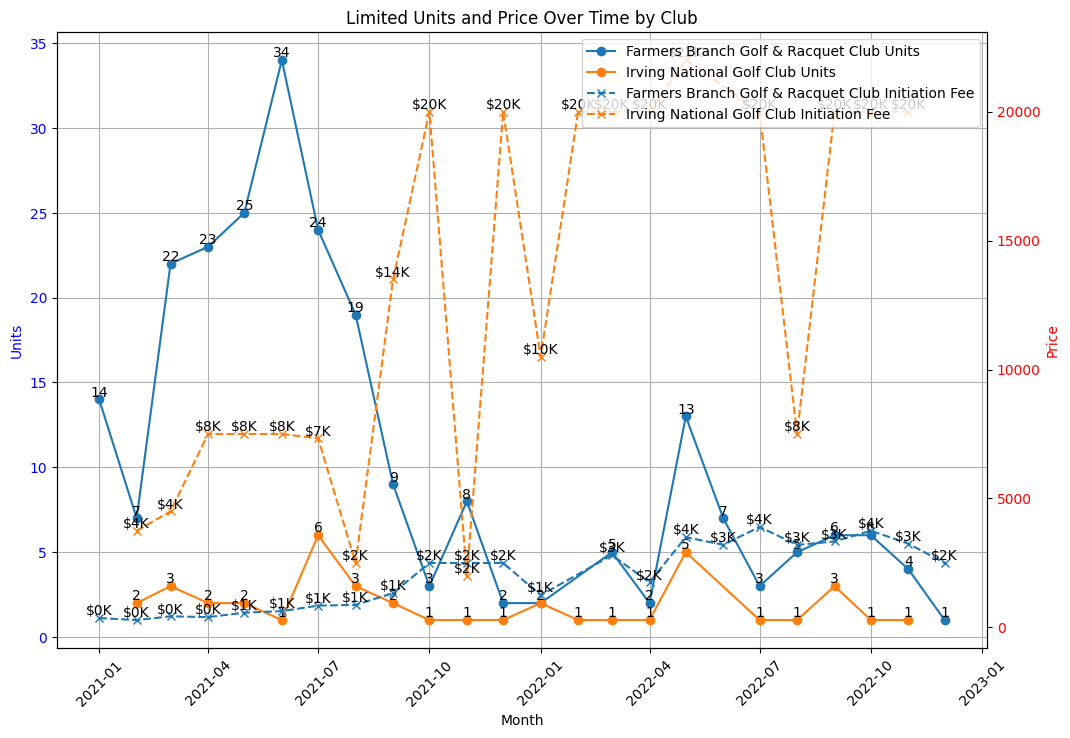

In [9]:
import matplotlib.pyplot as plt

# Ensure that the Join Month Year column is of period type
df['Join Month Year'] = df['Join Date'].dt.to_period('M')

# Group by Join Month Year and Club Name, and aggregate the data
df_grouped = df[df['Membership Type Access Category (Golf)'] == "Limited"].groupby(
    ['Join Month Year', 'Club Name']
).agg(
    {
        'Units': 'sum',
        'Initiation Fee Paid': 'mean'
    }
).reset_index()

# Sort by Join Month Year to ensure proper order
df_grouped = df_grouped.sort_values(by='Join Month Year')

# Create a figure and axis for the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting units on the first y-axis
for club in df_grouped['Club Name'].unique():
    club_data = df_grouped[df_grouped['Club Name'] == club]
    ax1.plot(club_data['Join Month Year'].dt.to_timestamp(), club_data['Units'], marker='o', linestyle='-', label=f'{club} Units')

    # Adding data labels for units directly on data points
    for i, txt in enumerate(club_data['Units']):
        ax1.text(club_data['Join Month Year'].dt.to_timestamp().iloc[i], club_data['Units'].iloc[i], 
                 f'{txt}', color='black', ha='center', va='bottom')

ax1.set_xlabel('Month')
ax1.set_ylabel('Units', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Create a second y-axis for the price
ax2 = ax1.twinx()

# Plotting price on the second y-axis
for club in df_grouped['Club Name'].unique():
    club_data = df_grouped[df_grouped['Club Name'] == club]
    ax2.plot(club_data['Join Month Year'].dt.to_timestamp(), club_data['Initiation Fee Paid'], marker='x', linestyle='--', label=f'{club} Initiation Fee')

    # Adding data labels for price directly on data points formatted as thousands of dollars
    for i, txt in enumerate(club_data['Initiation Fee Paid']):
        ax2.text(club_data['Join Month Year'].dt.to_timestamp().iloc[i], club_data['Initiation Fee Paid'].iloc[i], 
                 f'${txt / 1000:,.0f}K', color='black', ha='center', va='bottom')

ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Limited Units and Price Over Time by Club')

# Save the plot to a file
plt.savefig("LimitedUnitsandPriceOverTime.jpg", format='jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [10]:
df_grouped[df_grouped["Club Name"]=='Farmers Branch Golf & Racquet Club']

df_grouped[df_grouped["Club Name"]=='Irving National Golf Club']



,Join Month Year,Club Name,Units,Initiation Fee Paid
2,2021-02,Irving National Golf Club,2,3750.000000
4,2021-03,Irving National Golf Club,3,4500.000000
6,2021-04,Irving National Golf Club,2,7500.000000
8,2021-05,Irving National Golf Club,2,7500.000000
10,2021-06,Irving National Golf Club,1,7500.000000
12,2021-07,Irving National Golf Club,6,7333.333333
14,2021-08,Irving National Golf Club,3,2500.000000
16,2021-09,Irving National Golf Club,2,13500.000000
18,2021-10,Irving National Golf Club,1,20000.000000
20,2021-11,Irving National Golf Club,1,2000.000000


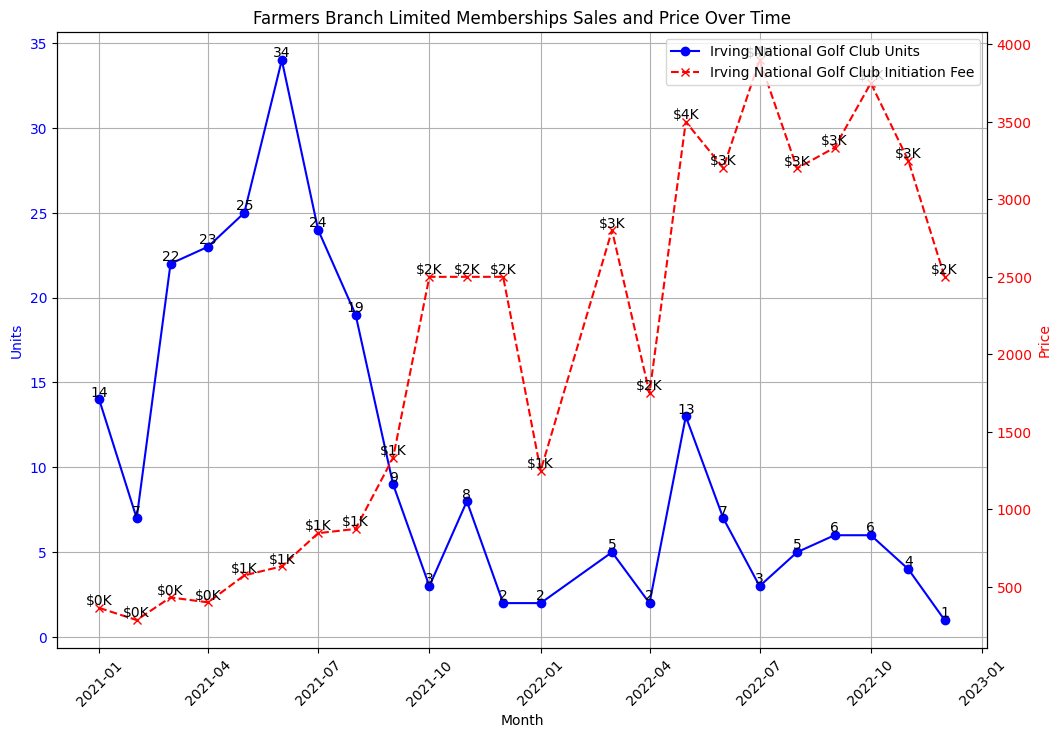

In [16]:
import matplotlib.pyplot as plt

# Ensure that the Join Month Year column is of period type
df['Join Month Year'] = df['Join Date'].dt.to_period('M')

# Group by Join Month Year and Club Name, and aggregate the data
df_grouped = df[df['Membership Type Access Category (Golf)'] == "Limited"].groupby(
    ['Join Month Year', 'Club Name']
).agg(
    {
        'Units': 'sum',
        'Initiation Fee Paid': 'mean'
    }
).reset_index()

# Sort by Join Month Year to ensure proper order
df_grouped = df_grouped.sort_values(by='Join Month Year')

# Create a figure and axis for the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting units on the first y-axis

club_data = df_grouped[df_grouped['Club Name'] == 'Farmers Branch Golf & Racquet Club']
ax1.plot(club_data['Join Month Year'].dt.to_timestamp(), club_data['Units'], marker='o', linestyle='-',color='blue', label=f'{club} Units')

    # Adding data labels for units directly on data points
for i, txt in enumerate(club_data['Units']):
    ax1.text(club_data['Join Month Year'].dt.to_timestamp().iloc[i], club_data['Units'].iloc[i], 
             f'{txt}', color='black', ha='center', va='bottom')

ax1.set_xlabel('Month')
ax1.set_ylabel('Units', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Create a second y-axis for the price
ax2 = ax1.twinx()

# Plotting price on the second y-axis

ax2.plot(club_data['Join Month Year'].dt.to_timestamp(), club_data['Initiation Fee Paid'], marker='x', linestyle='--', color='red',label=f'{club} Initiation Fee')

    # Adding data labels for price directly on data points formatted as thousands of dollars
for i, txt in enumerate(club_data['Initiation Fee Paid']):
    ax2.text(club_data['Join Month Year'].dt.to_timestamp().iloc[i], club_data['Initiation Fee Paid'].iloc[i], 
             f'${txt / 1000:,.0f}K', color='black', ha='center', va='bottom')

ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Farmers Branch Limited Memberships Sales and Price Over Time')

# Save the plot to a file
plt.savefig("FarmersBranchLimitedUnitsandPriceOverTime.jpg", format='jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
